## Regression Analysis: Energy Efficiency Regression

### Overview: 
This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


### Objective
This notebook demonstrates how to build and evaluate predictive models for the UCI Energy Efficiency dataset.

We aim to predict the **Heating Load** of buildings using two regression methods:
- Linear Regression
- Neural Network (MLPRegressor)

### Instructions for Students
1. Explore the dataset structure and identify relevant features.
2. Preprocess the data (e.g., normalization, train-test split).
3. Train a linear regression model and evaluate its performance.
4. Take a look at the coefficients of the model, what do you notice?
5. Train a lasso regression model and evaluate its performance.
6. Interpret model results and visualize prediction quality.
7. Train a Neural Network


Reference: Tsanas, A. & Xifara, A. (2012). Energy Efficiency [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

Follow the Jupyter notebook below and answer the tasks marked as ✅ Task for Students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
RANDOM_SEED = 42

In [3]:
# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(url)
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
              'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#### Plot the pairwise correlation heatmap between the features, analyze the plot.
Which features do you expect to have the highest weight in the regression equation?

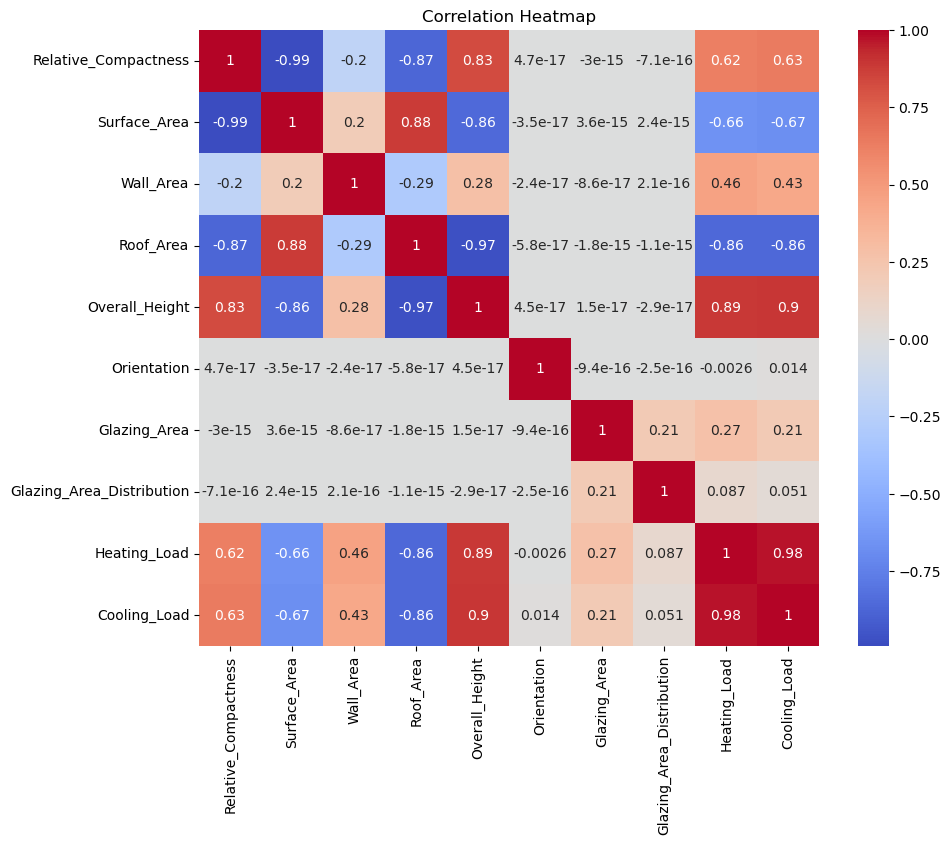

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####  Preprocessing:
-  Select features and target
-  split the data into train and test data
-  normalize the data 

In [7]:
# Select features and target
feature_names = df.iloc[:, :8].columns
X = df.iloc[:, :8]  # First 8 columns
y = df['Heating_Load']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_SEED)

In [9]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### ✅ Task for Students: Fit a simple Linear Regression model without changing any options

In [10]:
# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Evaluation Metrics
1. The **R²(Coefficient of Determination)** indicates how much variance in the target is explained by the model.

    $$
    R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
    $$
    
    Where:
    
    * $SS_{\text{res}} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
      (Residual Sum of Squares: error between true and predicted values)
    
    * $SS_{\text{tot}} = \sum_{i=1}^{n}(y_i - \bar{y})^2$
      (Total Sum of Squares: error between true values and their mean)
    
    * $y_i$: true value
    
    * $\hat{y}_i$: predicted value
    
    * $\bar{y}$: mean of all $y_i$

    Interpretation
    * $R^2 = 1$: perfect prediction
    * $R^2 = 0$: model predicts no better than mean
    * $R^2 < 0$: model is worse than just predicting the mean




2. The **MSE** gives the average squared error — smaller values are better.



  
3. The scatter plot helps visually identify how close the predictions are to the true values.

#### ✅ Task for Students: find and print the R2 score on test data

In [11]:
y_pred = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

R² Score: 0.9122


#### ✅ Task for Students: find and print the MSE for test data 

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 9.15


#### ✅ Task for Students: Plot a scatter plot for the true vs predicted values

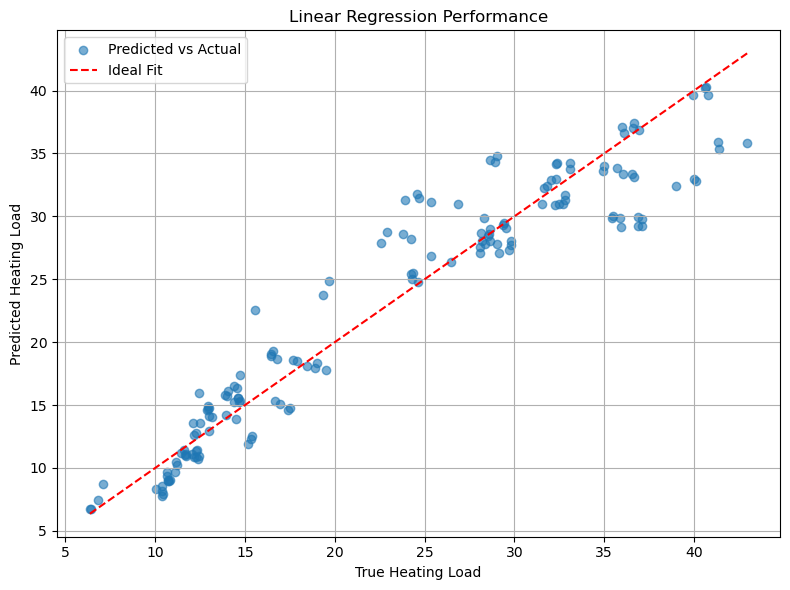

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Linear Regression Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### ✅ Task for Students: find and plot the coefficients of the linear regression model 
what are the highest coefficients, what do you notice? 

In [14]:
feature_names = X.columns
coefficients = lr.coef_

In [15]:
# find the coefficients of the regression model and plot them using bar plot
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])

# Sort by absolute value for correct feature importance
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)
importance_df

,Feature,Coefficient,Abs_Coefficient
4,Overall_Height,7.215464,7.215464
0,Relative_Compactness,-6.517601,6.517601
3,Roof_Area,-3.917367,3.917367
1,Surface_Area,-3.604586,3.604586
6,Glazing_Area,2.700051,2.700051
2,Wall_Area,0.795339,0.795339
7,Glazing_Area_Distribution,0.327345,0.327345
5,Orientation,-0.035934,0.035934


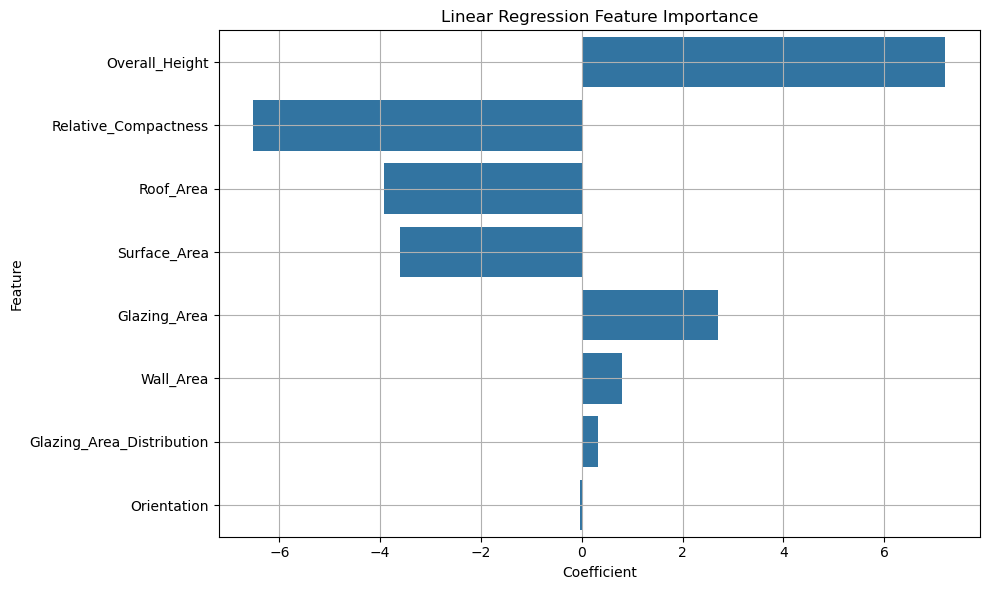

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Linear Regression Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

### Lasso Regression
Lasso(L1 Regularization) minimizes the sum of squared errors **plus** a penalty proportional to the **absolute values of the coefficients**. This L1 penalty encourages **sparsity**, meaning it pushes some coefficients to **zero**, effectively performing feature selection.

The loss function of Lasso regression is:

$$\mathcal{L}(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{p} |w_j|$$

Where:
* $m$: number of samples
* $y_i$: actual target value for sample $i$
* $\hat{y}_i = X_i \cdot \beta$: predicted value for sample $i$
* $w_j$: the $j$-th coefficient of the model
* $\alpha \geq 0$: regularization strength
* The **first term** is the **mean squared error (MSE)**
* The **second term** is the **L1 penalty** (sum of absolute values of the coefficients)

#### ✅ Task for students:
Define a Lasso regression model and prepare it for hyperparameter tuning using a range of alpha values using sklearn GridSearchCV with Logspace for Alpha logspace(-4, 0, 50). 

##### Why Use `np.logspace(-4, 0, 50)` for Alpha?
In Lasso regression, the `alpha` parameter controls the **strength of the L1 regularization**:

* A small `alpha` ≈ 0 → model behaves like regular linear regression (little regularization)
* A large `alpha` → more coefficients are shrunk to zero (stronger regularization)

**We use `logspace` instead of `linspace`** because:

* The effect of `alpha` is **non-linear**.
* Useful alpha values often **span several orders of magnitude**.
* `np.logspace(-4, 0, 50)` gives 50 values ranging from $10^{-4}$ to $10^0 = 1$, ensuring:

  * Fine granularity at small values (which matter a lot),
  * Broad enough range to find an optimal regularization strength.

This avoids over- or under-regularization and helps find a good trade-off between bias and variance.


##### What Are the Possible Values for `alpha`?

With `np.logspace(-4, 0, 50)`, the 50 `alpha` values range from:

```
[0.0001, 0.000120, ..., 1.0]
```

They are spaced **logarithmically**, so each is a fixed multiple of the previous one:

* First value ≈ 0.0001 (10⁻⁴)
* Last value = 1.0 (10⁰)
* The intermediate values are spaced such that:

  $$
  \alpha_i = 10^{\left(-4 + \frac{i \cdot 4}{49} \right)}, \quad i = 0, 1, ..., 49
  $$

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of alpha values
alphas = np.logspace(-4, 0, 50)

lasso = Lasso(max_iter=1000)
# # Set up the GridSearchCV for Lasso
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alphas}, cv=5)

#### ✅ Task for students: 
Train the Model on the Scaled Training Set and find the alpha of the best model

In [22]:
# Fit the model
lasso_cv.fit(X_train_scaled, y_train)

# # Print the best alpha 
best_lasso = lasso_cv.best_estimator_
best_lasso
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")

C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.802e+01, tolerance: 4.917e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.242e+01, tolerance: 4.966e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Best alpha: 0.0020235896477251557


#### ✅ Task for students: 
Extract and Inspect Feature Coefficients

,Feature,Coefficient,Abs_Coefficient
4,Overall_Height,7.296870,7.296870
0,Relative_Compactness,-6.282402,6.282402
1,Surface_Area,-6.177899,6.177899
6,Glazing_Area,2.699557,2.699557
2,Wall_Area,2.176468,2.176468
3,Roof_Area,-0.974710,0.974710
7,Glazing_Area_Distribution,0.326473,0.326473
5,Orientation,-0.034228,0.034228


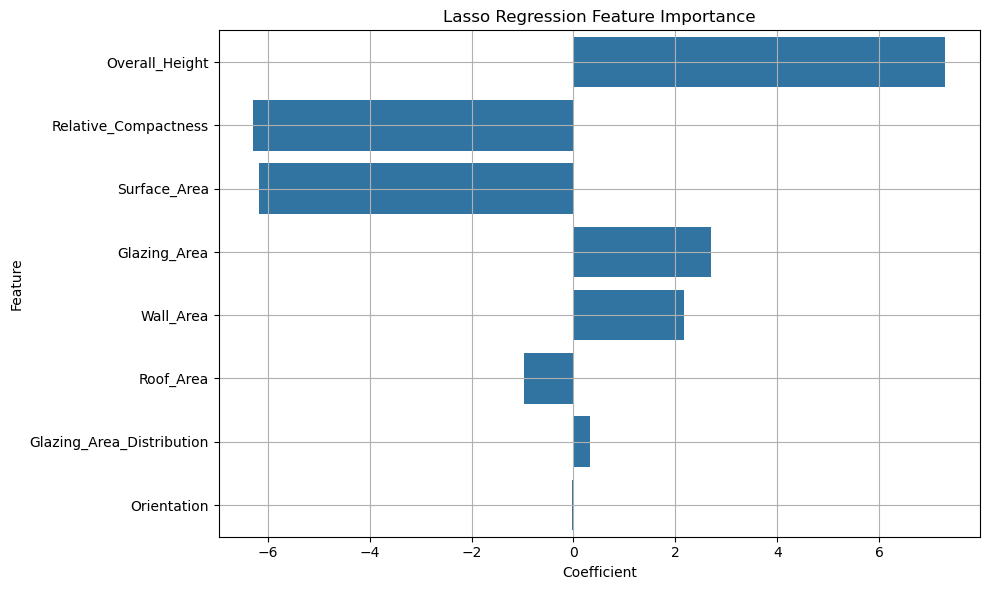

In [19]:
# Print feature importances
lasso_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso.coef_,
    'Abs_Coefficient': np.abs(best_lasso.coef_)
}).sort_values(by='Abs_Coefficient', ascending=False)

display(lasso_coeffs)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coeffs)
plt.title('Lasso Regression Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Summary for Students (please notice that this summary works for the exact same library versions and same random seed)

**Lasso** gives more interpretable and expected coefficients compared to plain **Linear Regression (LR)** in this case. This will be more obvious for datasets with more features and more colinearities between the features.
 

##### What Happens in this Case?

In the UCI Energy dataset:

* Several features (like `Surface_Area`, `Wall_Area`, `Roof_Area`) are **correlated**.
* **Multicollinearity** causes **Linear Regression** to:

  * Spread "credit" across these features
  * Assign large or unstable coefficients even to less important ones (like `Roof_Area`)
* This is why your LR model gave **unexpected top features** (e.g., high weight for `Roof_Area` despite low correlation)


#####  Why Lasso Performs Better Here

* **Lasso adds an L1 penalty**: It **forces the model to "choose"** between correlated features — selecting those with stronger direct influence on the target (e.g., `Overall_Height`, `Relative_Compactness`).
* This **sparsity effect** reveals clearer feature ranking.

##### Summary for Students

* Linear Regression fits **all** features and can be misled by multicollinearity.
* Lasso **penalizes** large, unnecessary coefficients and gives **simpler, clearer models**.
* In high-dimensional or correlated feature sets, **Lasso gives more reliable importance insights**.